# Dataset Wrangling

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

FIGSIZE = (16, 9)
sns.set_theme()

In [2]:
path = "../data/responses.csv"
df = pd.read_csv(path, header=0)

## Visualize

In [3]:
groups = {
"Music preferences": 19,
"Movie preferences": 12,
"Hobbies & interests": 32,
"Phobias": 10,
"Health habits": 3,
"Personality traits, views on life, & opinions": 57,
"Spending habits": 7,
"Demographics": 10
}

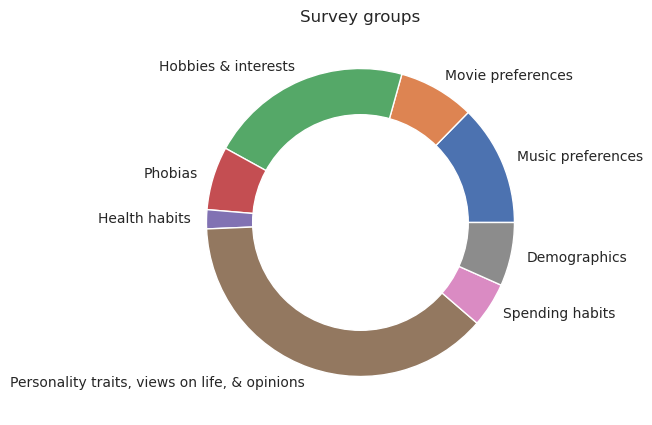

In [4]:
fig = plt.figure(figsize=(5,5))
plt.title("Survey groups")

# Create a pieplot
plt.pie(
    groups.values(),
    labels=groups.keys(),
    # colors=["brown"],
    textprops={'fontsize': 10}
)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Let us check for missing values in the dataset.

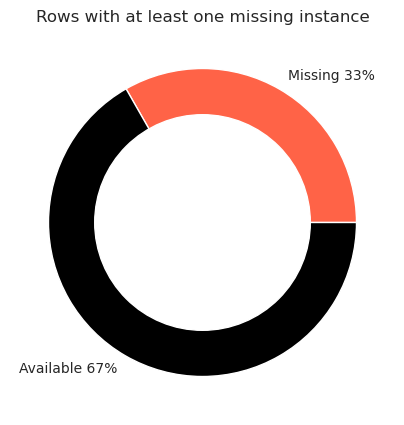

In [5]:
fig = plt.figure(figsize=(5,5))
plt.title("Rows with at least one missing instance")

missing = df[df.isnull().any(axis=1)].shape[0]
available = len(df) - missing

# Create a pieplot
plt.pie(
    [missing, available],
    labels=[f"Missing {100 * missing / len(df):.0f}%", f"Available {100 * available / len(df):.0f}%"],
    colors=["tomato", "black"],
    textprops={'fontsize': 10}
)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [6]:
print("Rows and columns in the dataframe:", df.shape)
print("Rows with missing values:", df[df.isnull().any(axis=1)].shape[0])

Rows and columns in the dataframe: (1010, 150)
Rows with missing values: 336


That is one third of the total rows! We cannot drop them.<br>
Let us replace them with mode values. Mean and Median are avoided as they may result in float values. All columns are integer valued.

In [7]:
# Replace NaN values with the mode of the respective column
for col in df.columns:
    df.loc[df[col].isnull(), col] = df[col].mode()[0]
print("Rows with missing values:", df[df.isnull().any(axis=1)].shape[0])

Rows with missing values: 0


In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 150 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    Music                           float64
 1    Slow songs or fast songs        float64
 2    Dance                           float64
 3    Folk                            float64
 4    Country                         float64
 5    Classical music                 float64
 6    Musical                         float64
 7    Pop                             float64
 8    Rock                            float64
 9    Metal or Hardrock               float64
 10   Punk                            float64
 11   Hiphop, Rap                     float64
 12   Reggae, Ska                     float64
 13   Swing, Jazz                     float64
 14   Rock n roll                     float64
 15   Alternative                     float64
 16   Latino                          float64
 17   Techno, Tran

A lot of columns are unnecessarily floats. Let's convert them to integers.

In [9]:
# Map all columns of datatype float64 to int64
df = df.apply(lambda x: x.astype('int64') if x.dtype == 'float64' else x)

Now, let's see if any of the object datatypes can be replaced with integers or one hot vectors.

In [10]:
non_int_cols = df.dtypes[df.dtypes != 'int64'].index
print(non_int_cols)

Index(['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage',
       'Gender', 'Left - right handed', 'Education', 'Only child',
       'Village - town', 'House - block of flats'],
      dtype='object')


In [11]:
for col in non_int_cols:
    unique_values = df[col].unique()
    print(f"{unique_values.shape[0]} | {col:25} | {unique_values}")

4 | Smoking                   | ['never smoked' 'tried smoking' 'former smoker' 'current smoker']
3 | Alcohol                   | ['drink a lot' 'social drinker' 'never']
3 | Punctuality               | ['i am always on time' 'i am often early' 'i am often running late']
4 | Lying                     | ['never' 'sometimes' 'only to avoid hurting someone'
 'everytime it suits me']
4 | Internet usage            | ['few hours a day' 'most of the day' 'less than an hour a day'
 'no time at all']
2 | Gender                    | ['female' 'male']
2 | Left - right handed       | ['right handed' 'left handed']
6 | Education                 | ['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil']
2 | Only child                | ['no' 'yes']
2 | Village - town            | ['village' 'city']
2 | House - block of flats    | ['block of flats' 'house/bungalow']


Fortunately, all columns have a small number of unique values. Hence, we can map them to integers or one-hot vectors. Some columns like `Smoking` and `Punctuality` seem to have an order to them, e.g., `never < tried < former < current`. So, they can be mapped to integers. Others, like `Gender` and `Right-handedness`, are better off with one-hot vectors.

For the time being, we'll leave them as is. We'll need the above preprocessing if we plug the data into a machine learning model.

In [12]:
df.to_csv("../data/responses_cleaned.csv", index=False)